## Installation

In [ ]:
!pip install torch==2.0.1 numpy==1.25.0 tqdm==4.65.0 transformers==4.33.2 lightning==2.0.9 pillow==9.5.0 accelerate matplotlib

In [2]:
%cd /workspace/sd_mine/data
# !curl -Lo "v1-5-pruned-emaonly.ckpt" "https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt"
# !curl -Lo "RealisticVisionv60.safetensors" "https://civitai.com/api/download/models/501240?type=Model&format=SafeTensor&size=pruned&fp=fp16"
!curl -Lo "dreamlike-photoreal-2.0.ckpt" "https://huggingface.co/dreamlike-art/dreamlike-photoreal-2.0/resolve/main/dreamlike-photoreal-2.0.ckpt"

/workspace/sd_mine/data
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


100  1123  100  1123    0     0   4909      0 --:--:-- --:--:-- --:--:--  4925
100 2034M  100 2034M    0     0  43.3M      0  0:00:46  0:00:46 --:--:-- 42.4M


## Imports and load model

In [3]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:

DEVICE = "cpu"

ALLOW_CUDA = True
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.backends.mps.is_built() or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device {DEVICE}")

Using device cuda


In [5]:
%cd /workspace/sd_mine/sd
tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
# model_file = "../data/v1-5-pruned-emaonly.ckpt"
model_file = "../data/dreamlike-photoreal-2.0.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)


/workspace/sd_mine/sd


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Experiments

In [7]:
# txt2img

# prompt = "an robot coding on a computer, highly detailed, hyperrealistic, cinematic, 8k, high resolution"
prompt = "A pepperoni pizza on a table"
uncond_prompt = "deformed, ugly, unrealistic"
do_cfg = True
cfg_scale = 7

# img2img
input_image = None
img_path = "../img/test.png"
# input_image = Image.open(img_path).convert('RGB')
strength = 0.75

sampler = "ddpm"
steps = 50
seed = 45

In [9]:
output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    steps=steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    weight_path=None,
    word=None,
    save=True,
)

100%|██████████| 50/50 [00:36<00:00,  1.37it/s]


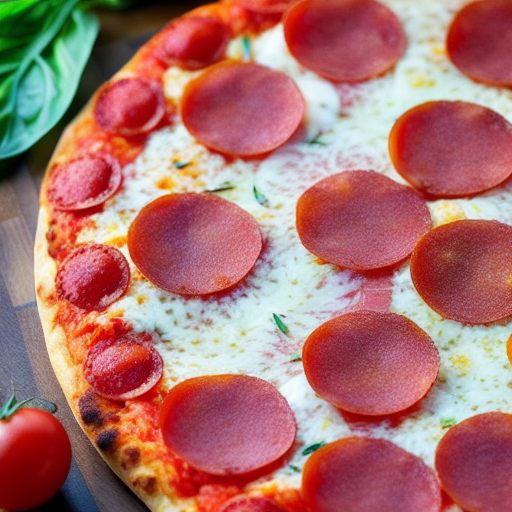

In [10]:
Image.fromarray(output_image).show()

100%|██████████| 50/50 [00:11<00:00,  4.43it/s]


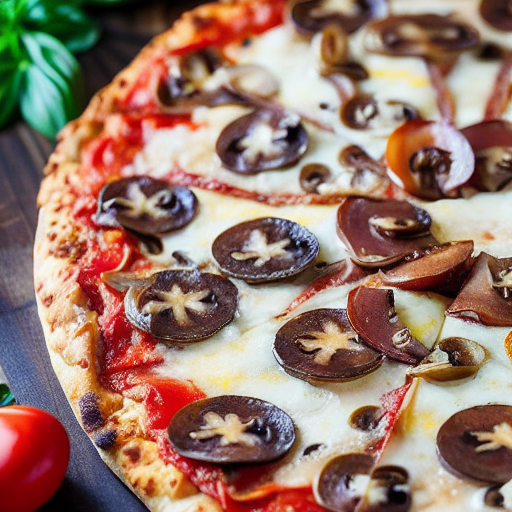

In [11]:
prompt_2 = "A mushroom pizza on a table"
output_image_2 = pipeline.generate(
    prompt=prompt_2,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    steps=steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    weight_path="attention_matrices/",
    word=None,
    coeff_attn=[1],
    th=0.3,
    save=False,
)
Image.fromarray(output_image_2).show()

100%|██████████| 50/50 [00:30<00:00,  1.62it/s]


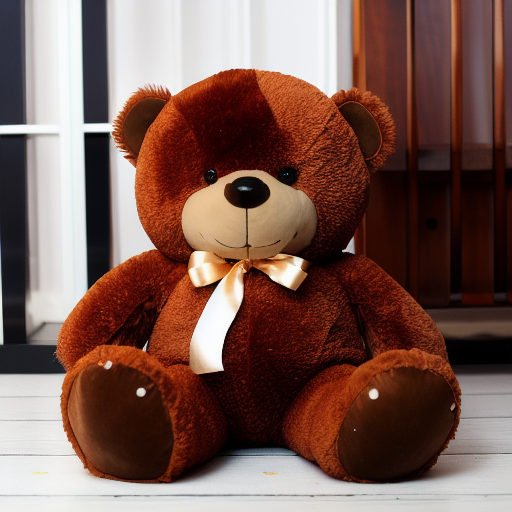

In [8]:
prompt = "a fluffy brown teddy bear"
seed = 42
output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    steps=steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    weight_path=None,
    word=None,
    coeff_attn=[1],
    th=1,
    save=True,
)
Image.fromarray(output_image).show()

100%|██████████| 50/50 [00:11<00:00,  4.29it/s]


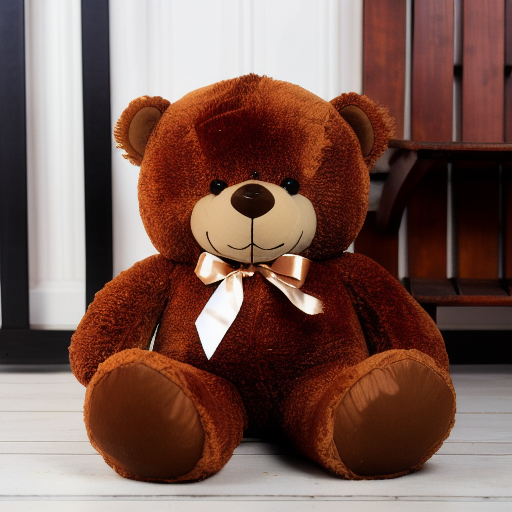

In [9]:
prompt_2 = "a fluffy brown teddy bear"
output_image_2 = pipeline.generate(
    prompt=prompt_2,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    steps=steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    weight_path="attention_matrices/",
    word=[2],
    coeff_attn=[-2],
    th=0,
    save=False,
)
Image.fromarray(output_image_2).show()

100%|██████████| 50/50 [00:10<00:00,  4.56it/s]


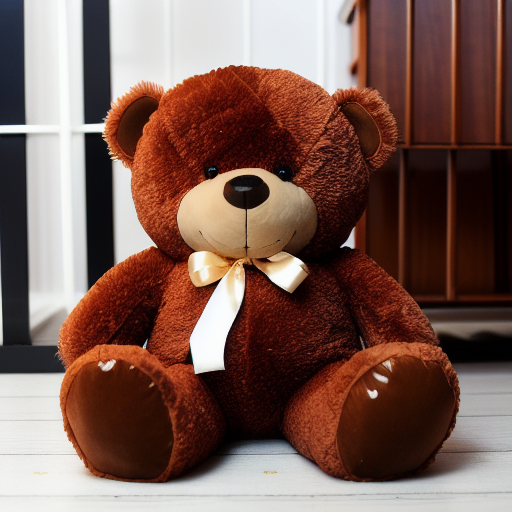

In [11]:
prompt_2 = "a fluffy brown teddy bear"
output_image_2 = pipeline.generate(
    prompt=prompt_2,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    steps=steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    weight_path="attention_matrices/",
    word=[2],
    coeff_attn=[5],
    th=0.3,
    save=False,
)
Image.fromarray(output_image_2).show()

Generating image with coeff_attn=-50


100%|██████████| 50/50 [00:10<00:00,  4.55it/s]


Generating image with coeff_attn=-40


100%|██████████| 50/50 [00:10<00:00,  4.64it/s]


Generating image with coeff_attn=-30


100%|██████████| 50/50 [00:10<00:00,  4.64it/s]


Generating image with coeff_attn=-20


100%|██████████| 50/50 [00:10<00:00,  4.60it/s]


Generating image with coeff_attn=-10


100%|██████████| 50/50 [00:10<00:00,  4.61it/s]


Generating image with coeff_attn=0


100%|██████████| 50/50 [00:10<00:00,  4.58it/s]


Generating image with coeff_attn=10


100%|██████████| 50/50 [00:10<00:00,  4.56it/s]


Generating image with coeff_attn=20


100%|██████████| 50/50 [00:10<00:00,  4.61it/s]


Generating image with coeff_attn=30


100%|██████████| 50/50 [00:10<00:00,  4.58it/s]


Generating image with coeff_attn=40


100%|██████████| 50/50 [00:10<00:00,  4.59it/s]


Generating image with coeff_attn=50


100%|██████████| 50/50 [00:10<00:00,  4.57it/s]


Generating image with coeff_attn=60


100%|██████████| 50/50 [00:10<00:00,  4.60it/s]


Generating image with coeff_attn=70


100%|██████████| 50/50 [00:10<00:00,  4.62it/s]


Generating image with coeff_attn=80


100%|██████████| 50/50 [00:10<00:00,  4.58it/s]


Generating image with coeff_attn=90


100%|██████████| 50/50 [00:10<00:00,  4.60it/s]


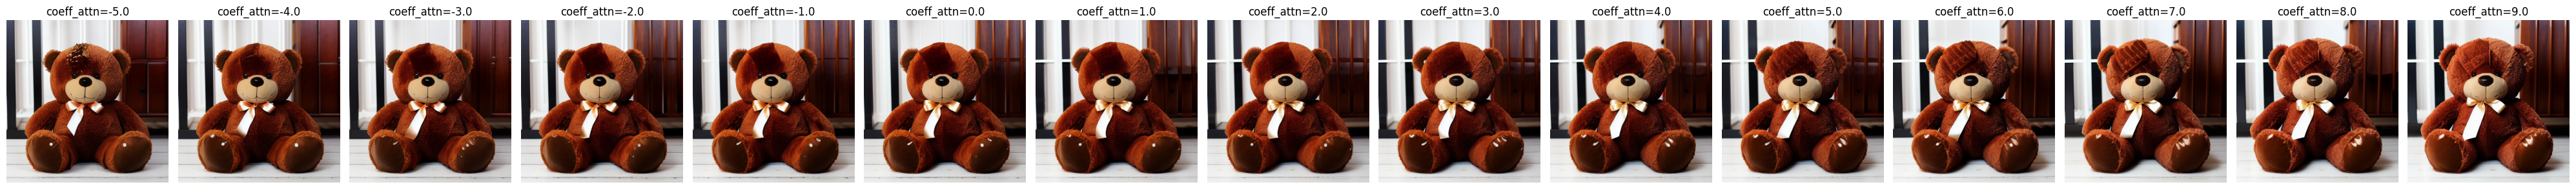

In [13]:

# Output frames
frames = []
output_dir = Path("output_frames")
output_dir.mkdir(exist_ok=True)

prompt = "a fluffy brown teddy bear"
coeff_values = list(range(-50, 100, 10))

fig, axes = plt.subplots(1, len(coeff_values), figsize=(40, 10))

for idx, c in enumerate(coeff_values):
    print(f"Generating image with coeff_attn={c}")

    output_image = pipeline.generate(
        prompt=prompt,
        uncond_prompt=uncond_prompt,
        input_image=input_image,
        strength=strength,
        do_cfg=do_cfg,
        cfg_scale=cfg_scale,
        sampler_name=sampler,
        steps=steps,
        seed=seed,
        models=models,
        device=DEVICE,
        idle_device="cpu",
        tokenizer=tokenizer,
        weight_path="attention_matrices/",
        word=[2],
        coeff_attn=[c/10],
        th=0.4,
        save=False,
    )

    img = Image.fromarray(output_image)
    frames.append(img)

    # Save each frame separately (optional)
    img.save(output_dir / f"frame_{c}.png")

    # Plot each image in the subplot
    axes[idx].imshow(img)
    axes[idx].set_title(f'coeff_attn={c/10}')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Save frames as a GIF
gif_path = "output_animation.gif"
frames[0].save(
    gif_path,
    save_all=True,
    append_images=frames[1:],
    duration=200,  # Duration per frame in milliseconds (100ms = 10 FPS)
    loop=0,  # Infinite loop
)

# print(f"GIF saved as {gif_path}")
# Image.open(gif_path).show()

In [9]:
%cd /workspace/sd_mine/sd
tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
# model_file = "../data/v1-5-pruned-emaonly.ckpt"
model_file = "/workspace/fine_tuning/logs/2025-02-21T09-49-24_digimon/checkpoints/epoch=000171.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/workspace/sd_mine/sd


In [10]:
# txt2img

# prompt = "an robot coding on a computer, highly detailed, hyperrealistic, cinematic, 8k, high resolution"
prompt = "a robot dog digimon, high quality"
uncond_prompt = ""
do_cfg = True
cfg_scale = 7

# img2img
input_image = None
img_path = "../img/test.png"
# input_image = Image.open(img_path).convert('RGB')
strength = 0.75

sampler = "ddpm"
steps = 50
seed = 46

100%|██████████| 50/50 [00:08<00:00,  5.70it/s]


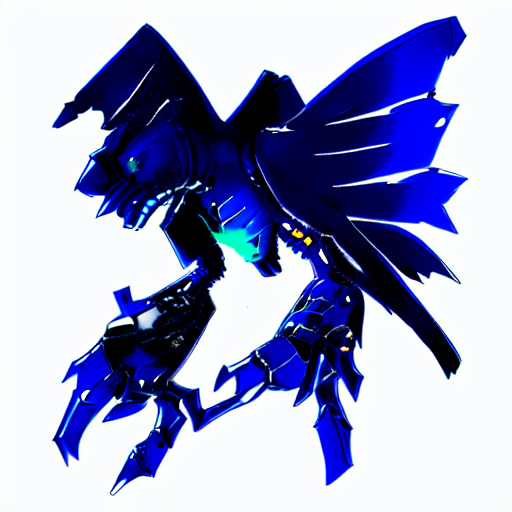

In [11]:
prompt = "a robotic with wings, high quality"
output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    steps=steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    weight_path=None,
    word=None,
    save=False,
)
Image.fromarray(output_image).show()

100%|██████████| 50/50 [00:11<00:00,  4.45it/s]


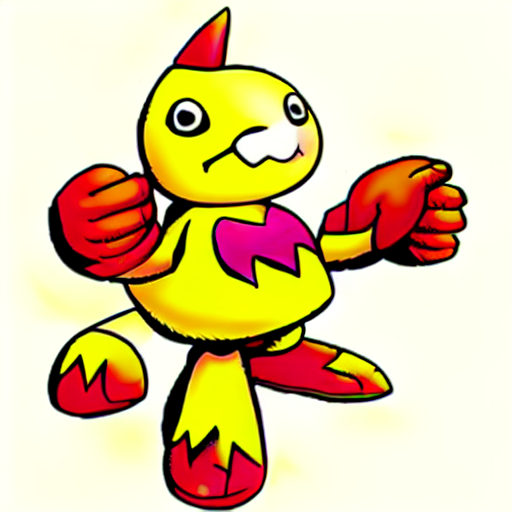

In [9]:
prompt_2 = "A mushroom pizza on a table"
output_image_2 = pipeline.generate(
    prompt=prompt_2,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    steps=steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    weight_path="attention_matrices/",
    word=None,
    coeff_attn=[1],
    th=1,
)
Image.fromarray(output_image_2).show()